### Dataset 3: Breast Cancer Wisconsin (Diagnostic) Data Set
Dataset with features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Including:\
Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, Fractal Dimension.\
Data source: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

Analysis Guidance Sources:\
[Breast Cancer Classification](https://www.kaggle.com/code/niteshyadav3103/breast-cancer-classification#K-Neighbors-Classifier-(KNN))\
[Breast Cancer Analysis and Prediction](https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction#2.-Exploratory-Data-Analysis-(EDA))\
[Exercise: SHAP Values](https://www.kaggle.com/code/dansbecker/exercise-shap-values)

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Reading Cleaned Dataset
file_path = os.path.join('..', 'datasets', 'breast_cancer_wisconsin_diagnostic_cleaned.csv')
print("Reading Path:", os.path.abspath(file_path))

if os.path.exists(file_path):
    df_original = pd.read_csv(file_path)
    print("Reading Succeeded. Data Shape:",df_original.shape)
    display(df_original.head())
else:
    print("File Not Found. Make sure the dataset is under the 'datasets' folder.")

Reading Path: /home/frankli/Desktop/breast-cancer-eda/datasets/breast_cancer_wisconsin_diagnostic_cleaned.csv
Reading Succeeded. Data Shape: (569, 31)


/home/frankli/Desktop/breast-cancer-eda/notebooks/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Splitting Features and Target from the original DataFrame
features = df_original.drop(columns=['diagnosis'])
target = df_original['diagnosis']

In [3]:
# Normalizing Features
means = features.mean()
stds = features.std()
features_normalized = (features - means) / stds

df_normalized = pd.concat([features_normalized, target], axis=1)
output_filename = os.path.join('..', 'datasets', 'normalized', 'breast_cancer_wisconsin_diagnostic_normalized.csv')
df_normalized.to_csv(output_filename, index=False)
display(df_normalized.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1


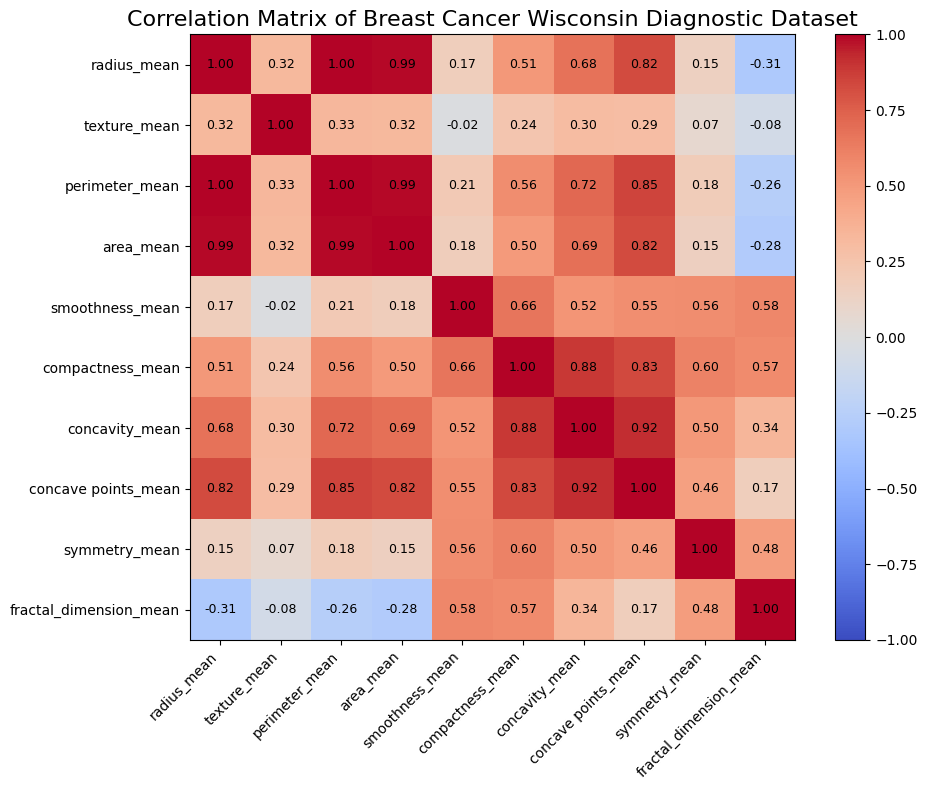

In [4]:
# Visualizing Using the Heatmap
df_mean = df_original.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                                    'compactness_se','concavity_se','concave points_se','symmetry_se',
                                    'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst'
                                    ,'area_worst','smoothness_worst','compactness_worst','concavity_worst'
                                    ,'concave points_worst','symmetry_worst','fractal_dimension_worst','diagnosis'])
corr = df_mean.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=9)

ax.set_title("Correlation Matrix of Breast Cancer Wisconsin Diagnostic Dataset", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_50160/3104237844.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Benign', 'Malignant'], widths=0.6)
/tmp/ipykernel_50160/3104237844.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Benign', 'Malignant'], widths=0.6)
/tmp/ipykernel_50160/3104237844.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([benign_data, malignant_data], labels=['Benign', 'Malignant'], widths=0.6)
/tmp/ipykernel_50160/3104237844.py:18: MatplotlibDeprecationWarning: The 'labels' parameter

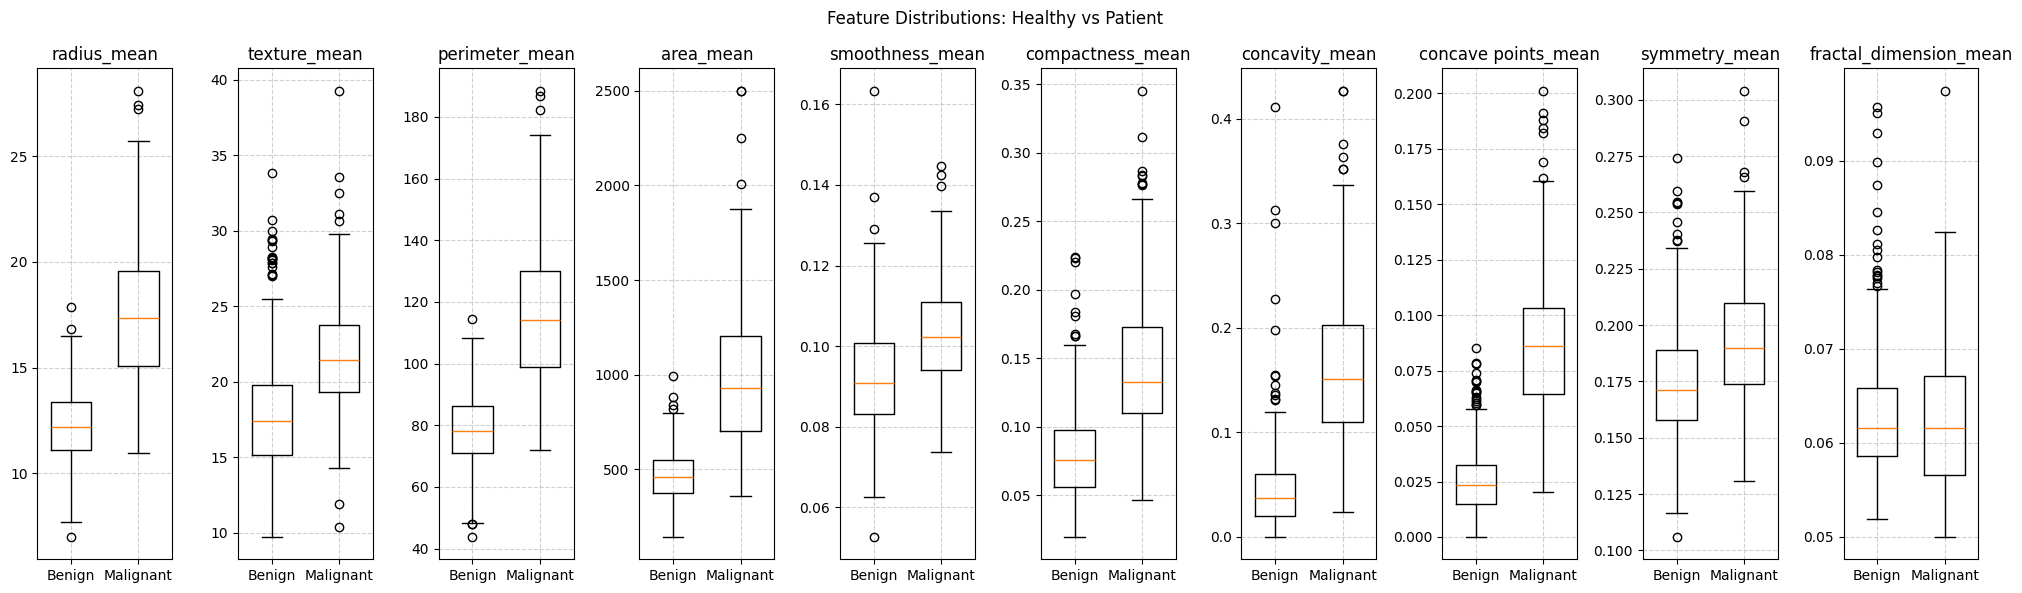

In [5]:
# Boxplots for Feature Distributions
import matplotlib.pyplot as plt

dataframe = df_original

features = [col for col in dataframe.columns if col not in ['radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                                    'compactness_se','concavity_se','concave points_se','symmetry_se',
                                    'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst'
                                    ,'area_worst','smoothness_worst','compactness_worst','concavity_worst'
                                    ,'concave points_worst','symmetry_worst','fractal_dimension_worst','diagnosis']]

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 6))

for idx, feature in enumerate(features):
    benign_data = dataframe[dataframe['diagnosis'] == 0][feature]
    malignant_data = dataframe[dataframe['diagnosis'] == 1][feature]
    
    axes[idx].boxplot([benign_data, malignant_data], labels=['Benign', 'Malignant'], widths=0.6)
    axes[idx].set_title(feature)
    axes[idx].grid(True, linestyle='--', alpha=0.6)

plt.suptitle("Feature Distributions: Healthy vs Patient")
plt.tight_layout()
plt.show()

/tmp/ipykernel_50160/4286642906.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radius_counts = df_original.groupby(['radius_group', 'diagnosis']).size().unstack()


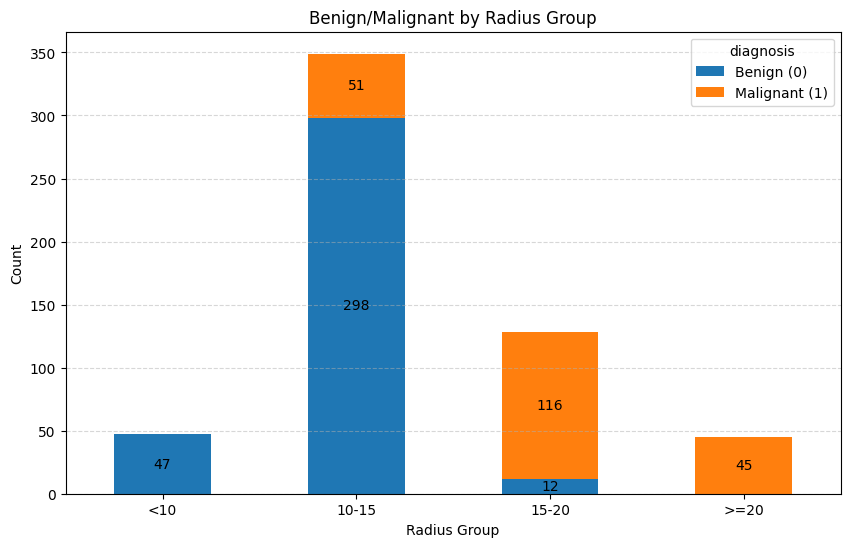

In [6]:
# Bar Chart for Age Brackets vs Malignancy Prevalence

bins = [0, 10, 15, 20, 30]
labels_radius = ['<10', '10-15', '15-20', '>=20']
df_original['radius_group'] = pd.cut(df_original['radius_mean'], bins=bins, labels=labels_radius)

radius_counts = df_original.groupby(['radius_group', 'diagnosis']).size().unstack()

ax = radius_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Benign/Malignant by Radius Group')
plt.xlabel('Radius Group')
plt.ylabel('Count')
plt.legend(['Benign (0)', 'Malignant (1)'], title='diagnosis')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.text(x + width/2, y + height/2, f'{int(height)}', 
                ha='center', va='center')

plt.show()

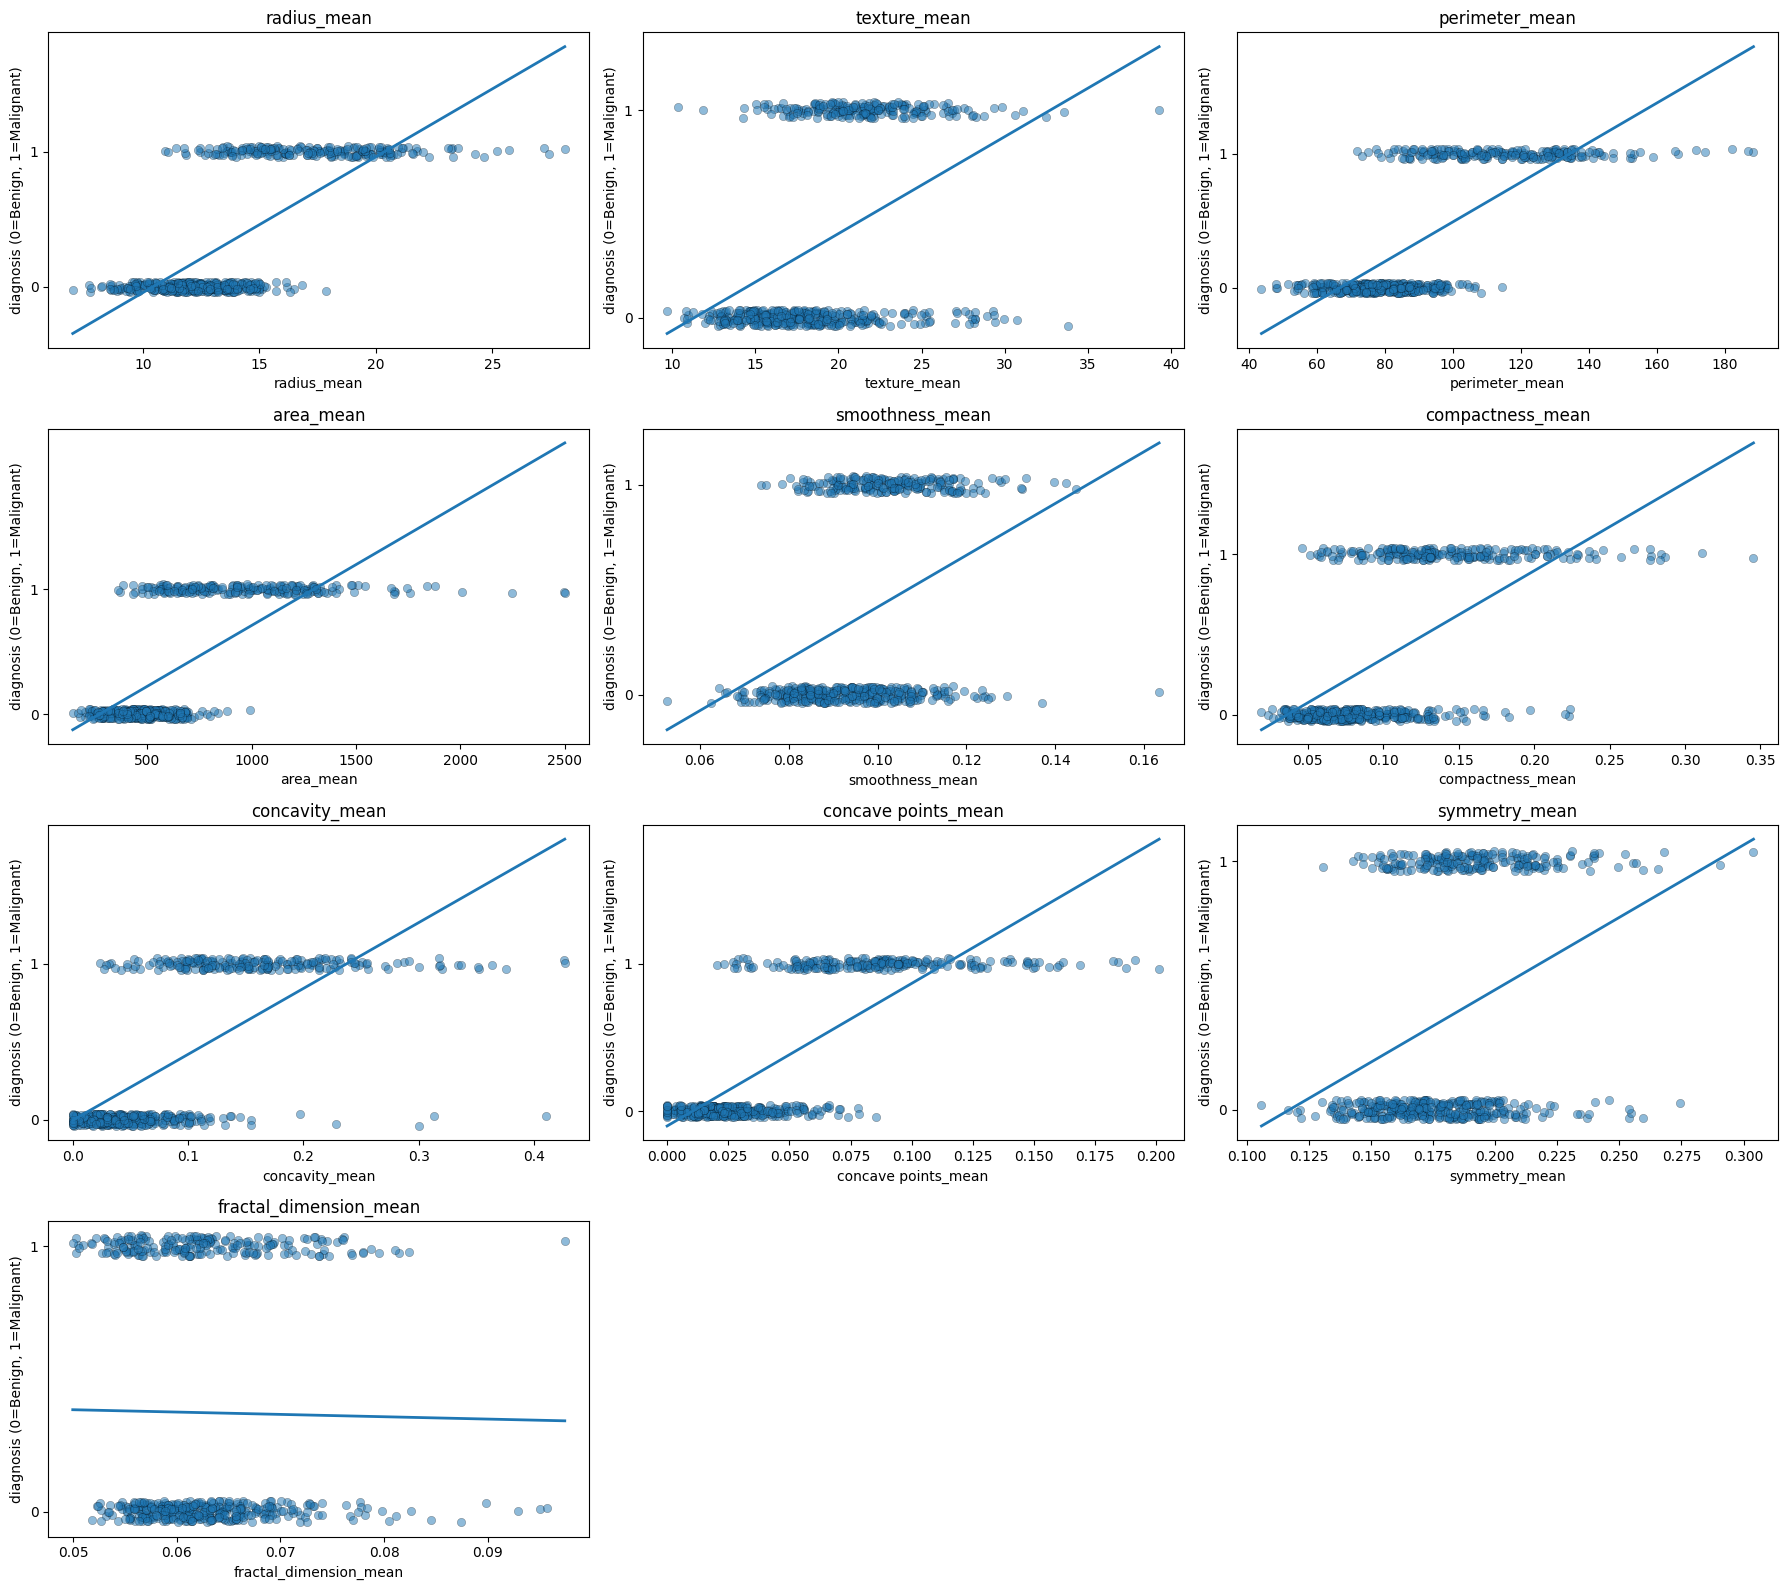

In [7]:
# Scatter Plots with Trend Lines for All Features
from sklearn.linear_model import LinearRegression

numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'diagnosis']
selected_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean'
                     ,'concave points_mean','symmetry_mean','fractal_dimension_mean']

n_features = len(selected_features)
n_cols = 3 
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    ax = axes[i]
    
    x = df_original[feature].values.reshape(-1, 1)
    y = df_original['diagnosis'].values.astype(float)

    y_jitter = y + 0.08 * np.random.rand(len(y)) - 0.04
    ax.scatter(x, y_jitter, alpha=0.5, edgecolor='k', linewidth=0.3)


    model = LinearRegression()
    model.fit(x, y)
    x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)
    ax.plot(x_line, y_line, linewidth=2)

    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('diagnosis (0=Benign, 1=Malignant)')
    ax.set_yticks([0, 1])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

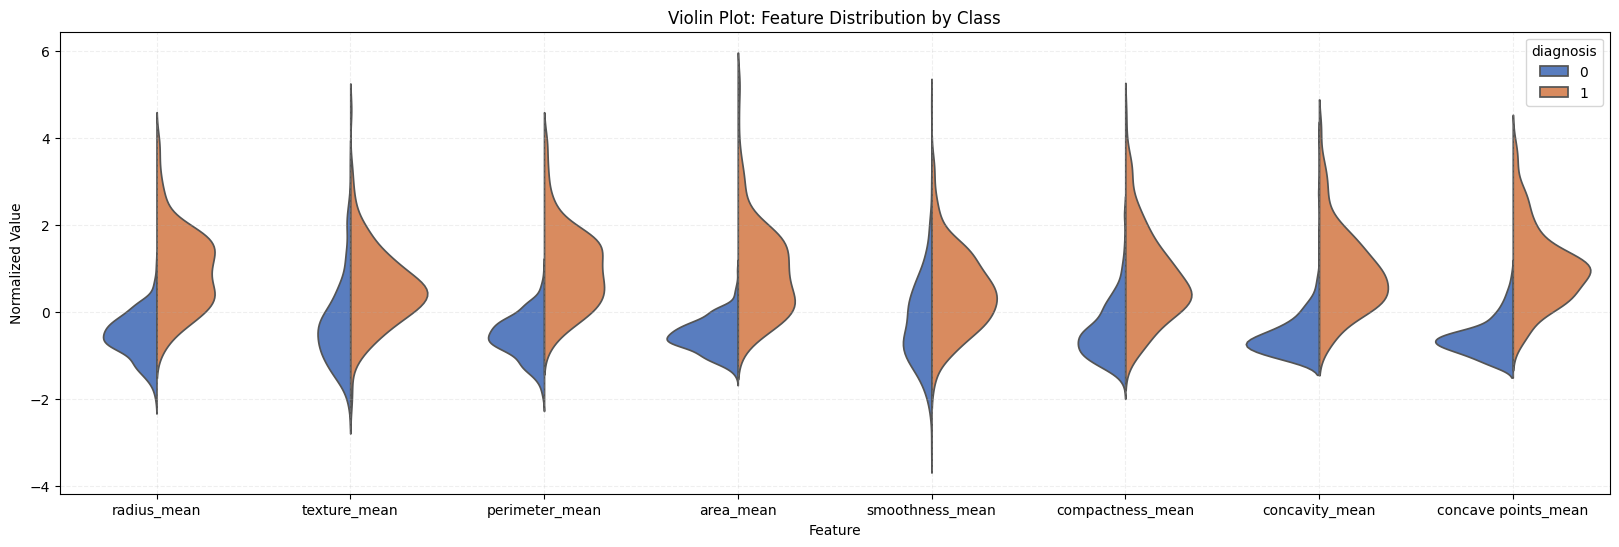

In [8]:
# Modified from Breast Cancer Analysis and Prediction by Vincent Lugat
# https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction/notebook#2.-Exploratory-Data-Analysis-(EDA)

key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 
                'compactness_mean', 'concavity_mean', 'concave points_mean'] 
valid_features = [col for col in key_features if col in df_normalized.columns]

df_melted = df_normalized.melt(id_vars=['diagnosis'], 
                               value_vars=valid_features, 
                               var_name='Feature', 
                               value_name='Normalized Value')

plt.figure(figsize=(20, 6))

sns.violinplot(x='Feature', y='Normalized Value', hue='diagnosis', 
               data=df_melted, split=True, inner=None, palette="muted")

plt.title('Violin Plot: Feature Distribution by Class')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

Logistic Regression: 97.72%
KNN (k=1): 94.91%
SVM (RBF, C=3.0): 64.14%
Naive Bayes: 93.15%
Decision Tree: 92.62%
Random Forest: 95.61%
Gradient Boosting: 96.14%


/tmp/ipykernel_50160/246576492.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')


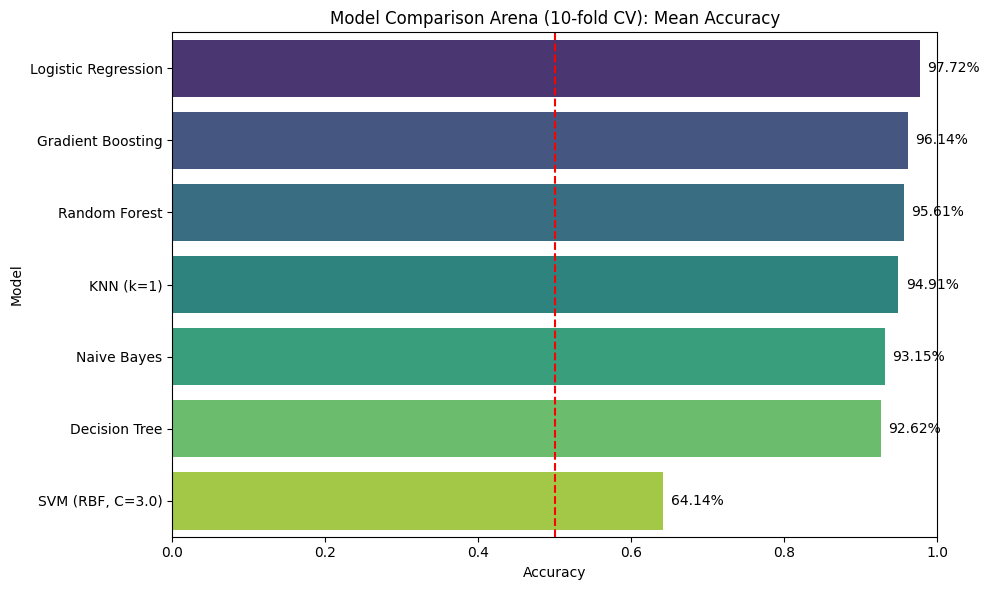

In [9]:
# Modified from Breast Cancer Classification by Nitesh Yadav
# https://www.kaggle.com/code/niteshyadav3103/breast-cancer-classification#Logistic-Regression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare X and y from the existing data
X = features_normalized
y = target

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN (k=1)', KNeighborsClassifier(n_neighbors=1)),
    ('SVM (RBF, C=3.0)', SVC(kernel='rbf', C=0.01)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

results = []
names = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    accs = []
    for train_idx, valid_idx in skf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        m = clone(model)
        m.fit(X_train, y_train)
        y_pred = m.predict(X_valid)
        
        accs.append(accuracy_score(y_valid, y_pred))
    
    mean_acc = np.mean(accs)
    results.append(mean_acc)
    names.append(name)
    print(f"{name}: {mean_acc:.2%}")

plt.figure(figsize=(10, 6))

df_results = pd.DataFrame({'Model': names, 'Accuracy': results})
df_results = df_results.sort_values(by='Accuracy', ascending=False)

sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')

plt.xlim(0, 1.0)
plt.title('Model Comparison Arena (10-fold CV): Mean Accuracy')
plt.axvline(x=0.5, color='red', linestyle='--', label='Random Guess')
for i, v in enumerate(df_results['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.2%}', va='center')

plt.tight_layout()
plt.show()


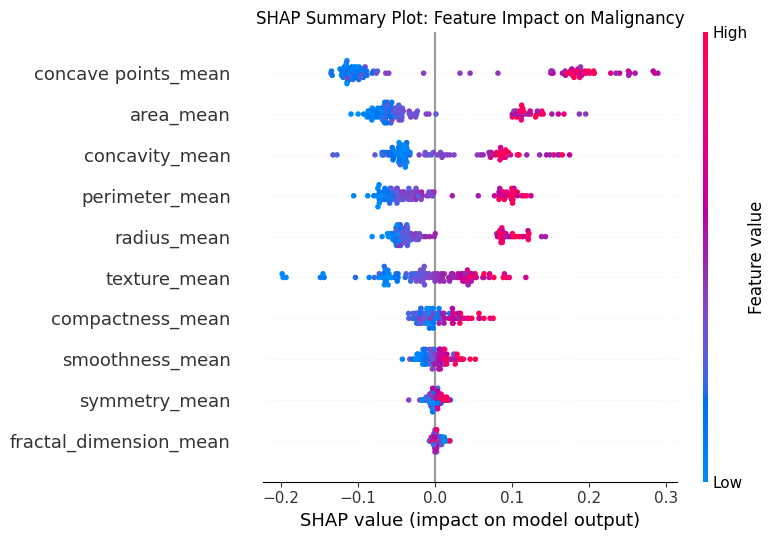

Top Influential Feature: concave points_mean


In [10]:
# Modified from Exercise: SHAP Values by DanB
# https://www.kaggle.com/code/dansbecker/exercise-shap-values

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(df_mean, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_vals_target = shap_values[1]
else:
    if len(shap_values.shape) == 3:
        shap_vals_target = shap_values[:, :, 1]
    else:
        shap_vals_target = shap_values

plt.figure(figsize=(10, 8))
plt.title("SHAP Summary Plot: Feature Impact on Malignancy")
shap.summary_plot(shap_vals_target, X_test, show=False)
plt.show()

import numpy as np
if isinstance(shap_vals_target, np.ndarray):
    mean_shap = np.abs(shap_vals_target).mean(axis=0)
    top_feature_idx = np.argsort(mean_shap)[-1]
    top_feature_name = X_test.columns[top_feature_idx]
    print(f"Top Influential Feature: {top_feature_name}")
